<h1>Quantum Harmonic Oscillator</h1>
<p>The QHO is in the state</p>

$$\psi(x,0) = \frac{1}{2}(\psi_0(x) + \psi_1(x) + \psi_2(x) + \psi_3(x))$$

where $\psi_n$ is the $n^{th}$ energy eigenstate of the quantum harmonic oscillator(in the position basis), given by the wavefunction:
$$\psi_n = {\left(\frac{m\omega}{\pi\hbar}\right)}^{1/4}\frac{1}{\sqrt{2^n n!}}H_n(\xi)e^{-\xi^2/2}$$
and the energy of the $n^{th}$ eigenstate being:
$$E_n = \hbar\omega(n + \frac{1}{2})$$
To simplify, we use $m = \omega = \hbar = 1$ 


In [255]:
from sympy.physics.quantum import Wavefunction
from sympy.functions import sqrt, exp, factorial
from sympy import symbols, hermite, pi, I, oo, Abs, lambdify
from sympy.plotting import plot
import matplotlib.pyplot as plt
from numpy import linspace, arange

x = symbols('x', real = True)
t = symbols('t', real = True)
n = symbols('n', integer = True, positive = True)
psi = symbols('psi')
t = 37
#Energy eigenstate of the QHO
psi_g = (1/pi)**(1/4) * 1/sqrt(2**n * factorial(n)) * hermite(n, x) * exp((-x**2)/2)
#Energy eigenvalue
e_g = n + 1/2
#Phase evolution of the eigenstate by time evolution
phase_evolved = psi_g * exp(-I * e_g * t)

<h2>Time evolution of the wavefunction</h2>

Time evolution is given by: $$\psi(x, t) = e^{\frac{-iHt}{\hbar}}\psi(x, 0)$$
$$\psi(x, t) = \frac{1}{2}(e^{\frac{-iE_0t}{\hbar}}\psi_0(x) + e^{\frac{-iE_1t}{\hbar}}\psi_1(x) + e^{\frac{-iE_2t}{\hbar}}\psi_2(x) + e^{\frac{-iE_3t}{\hbar}}\psi_3(x))$$
since $\psi_n(x)$ is an eigenstate of the Hamiltonian $H$.

In [256]:
psi =1/2 * (phase_evolved.subs(n, 0) + phase_evolved.subs(n, 1) + phase_evolved.subs(n, 2) + phase_evolved.subs(n, 3))
re, im = psi.as_real_imag()

psi

0.5*sqrt(2)*x*exp(-55.5*I)*exp(-x**2/2)/pi**0.25 + 0.125*sqrt(2)*(4*x**2 - 2)*exp(-92.5*I)*exp(-x**2/2)/pi**0.25 + 0.0416666666666667*sqrt(3)*(8*x**3 - 12*x)*exp(-129.5*I)*exp(-x**2/2)/pi**0.25 + 0.5*exp(-18.5*I)*exp(-x**2/2)/pi**0.25

The norm of the state $\psi(x, t=37)$ remains the same:

In [257]:
psi_wf = Wavefunction(psi, (x, -oo, oo))
print(f"Norm = {psi_wf.norm}")
print(f"{psi_wf.is_normalized}")

Norm = 1.00000000000000
True


<h2>Plotting Real and Complex parts of the wavefunction</h2>

The real component of $\psi(x, t=37)$ is shown below:

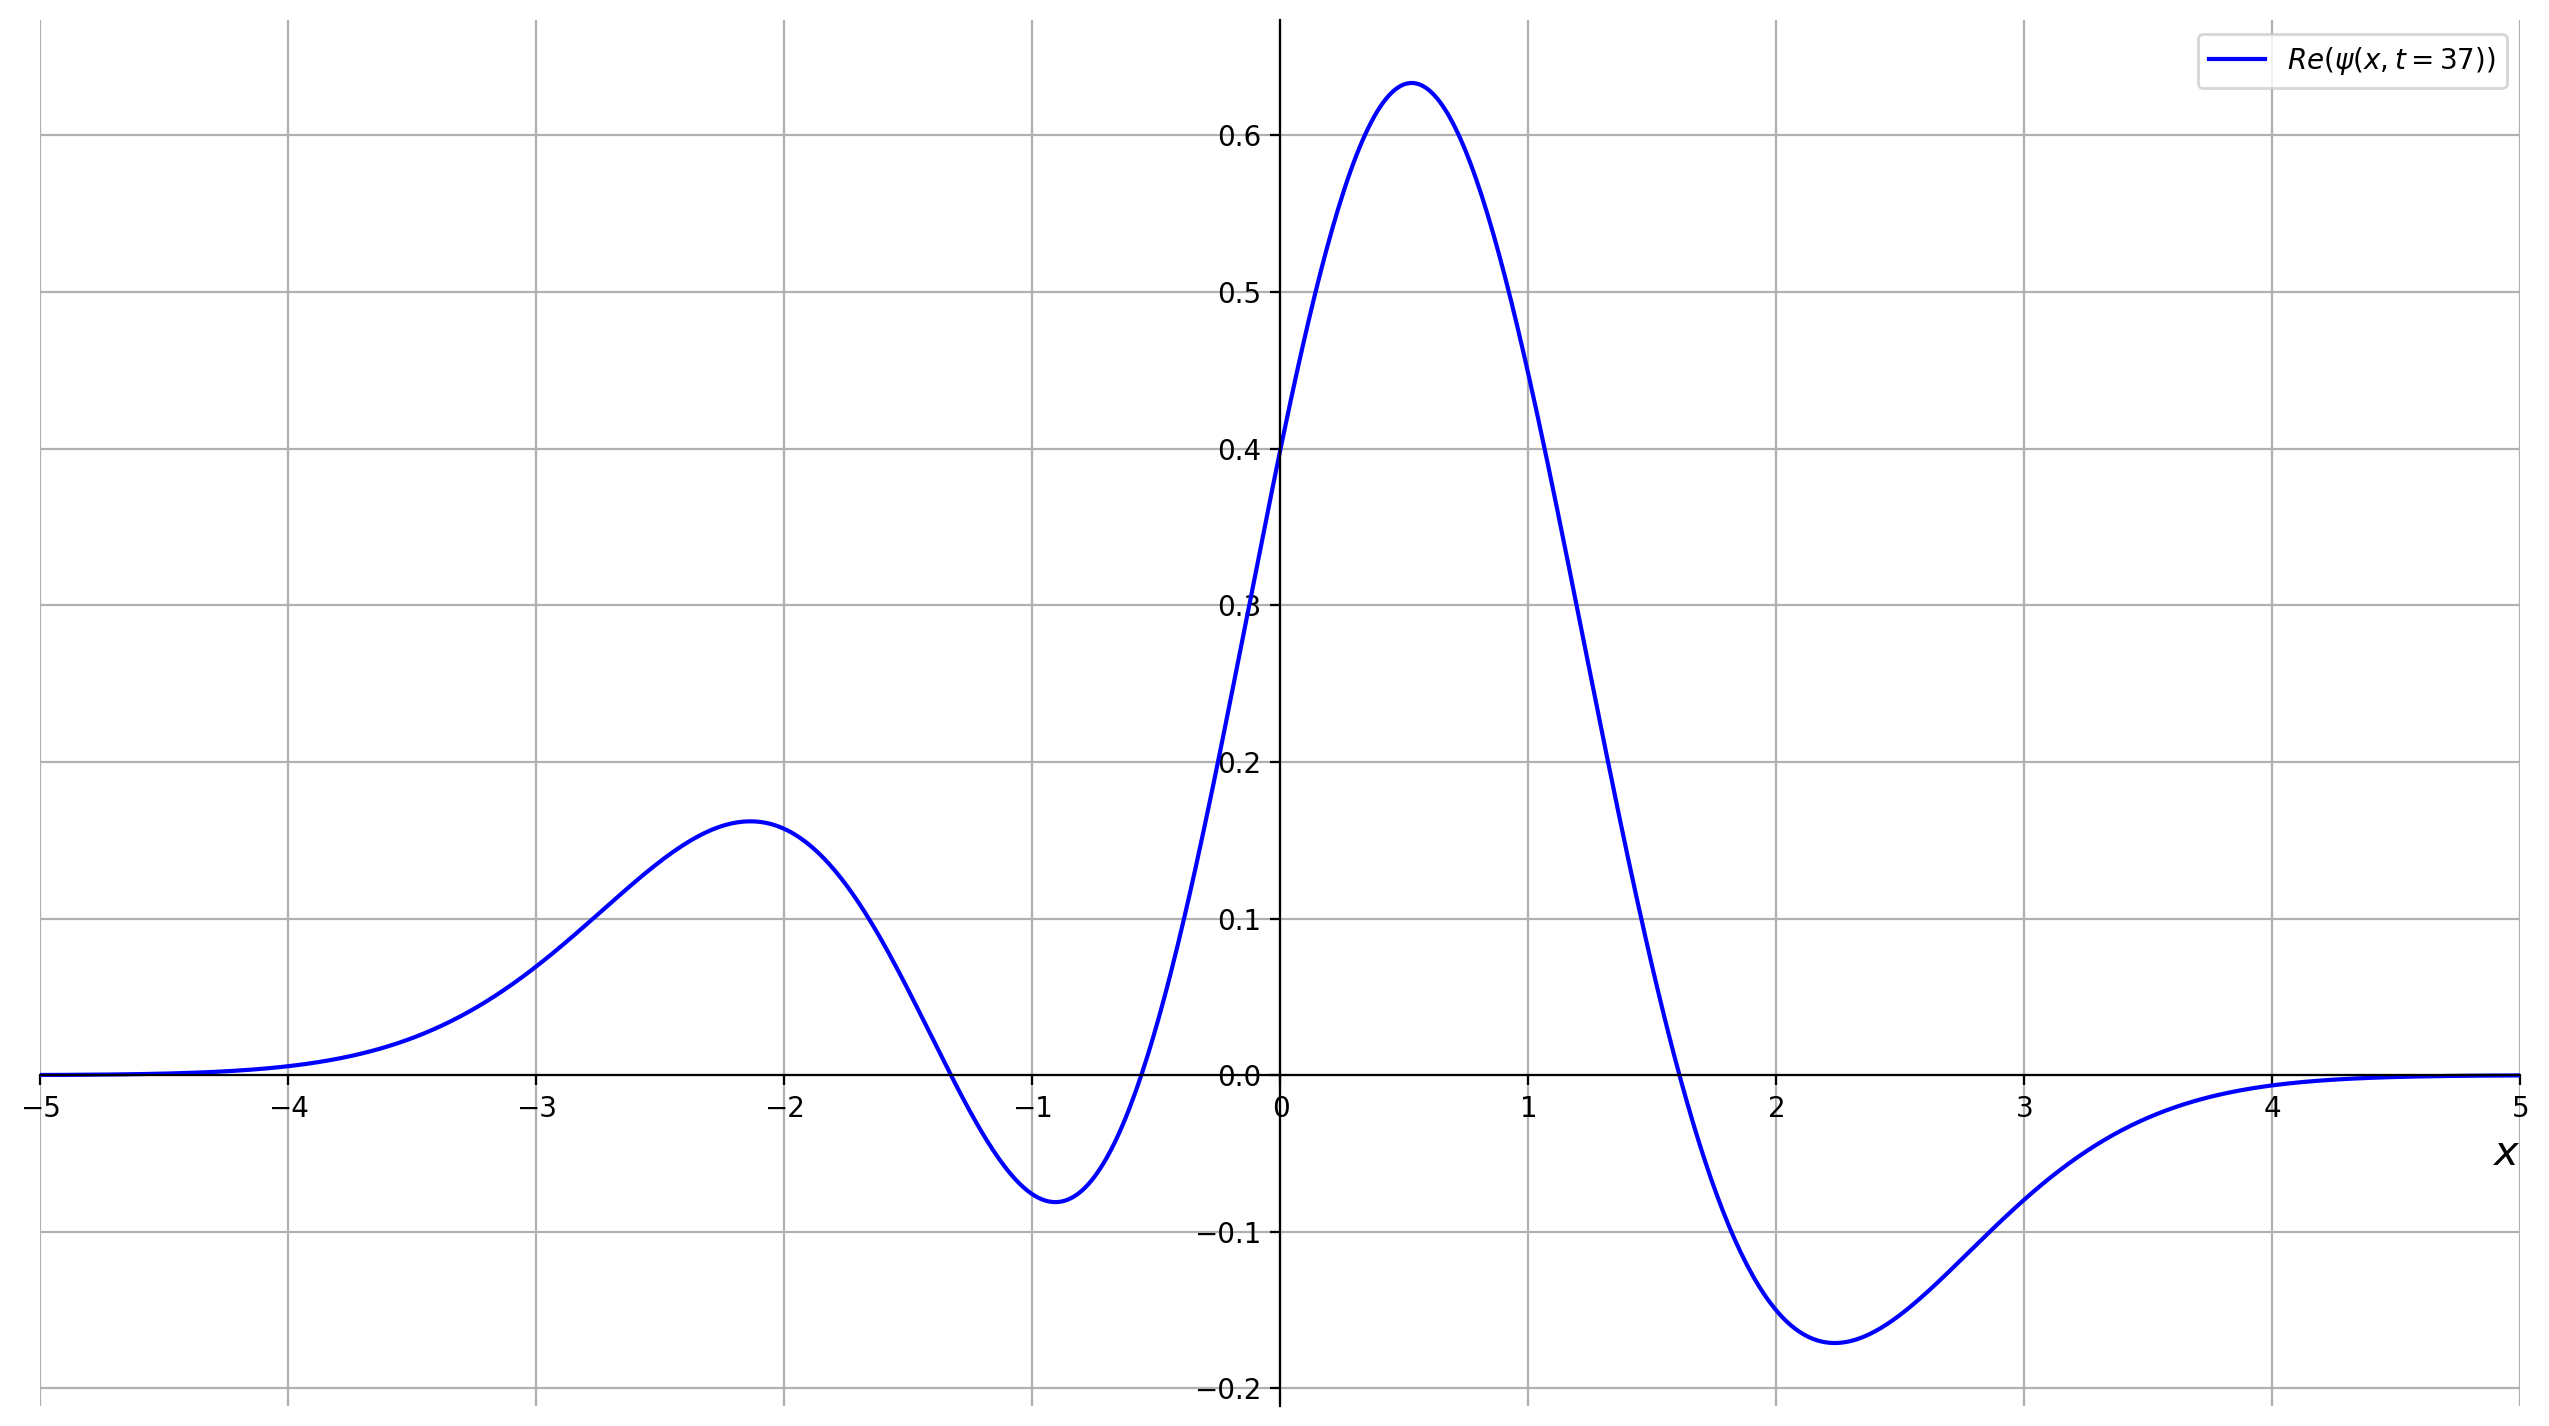

In [276]:
lam_psi_re = lambdify(x, re, modules=['numpy'])
x_var = linspace(-6,6,1000)
psi_re = lam_psi_re(x_var)

fig, ax = plt.subplots(1,1, figsize=(16,9), dpi=200)
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')

plt.xlim(-5,5)
ax.set_xlabel(r'$x$', fontsize=15, loc='right')
ax.set_xticks(arange(-5, 5.5, 1))
ax.grid(True)
ax.plot(x_var, psi_re, label=r'$Re(\psi(x, t=37))$', color='blue')
ax.legend()
plt.savefig('Real.jpeg',bbox_inches='tight')

plt.show()

The imaginary component of $\psi(x, t=37)$ is shown below:

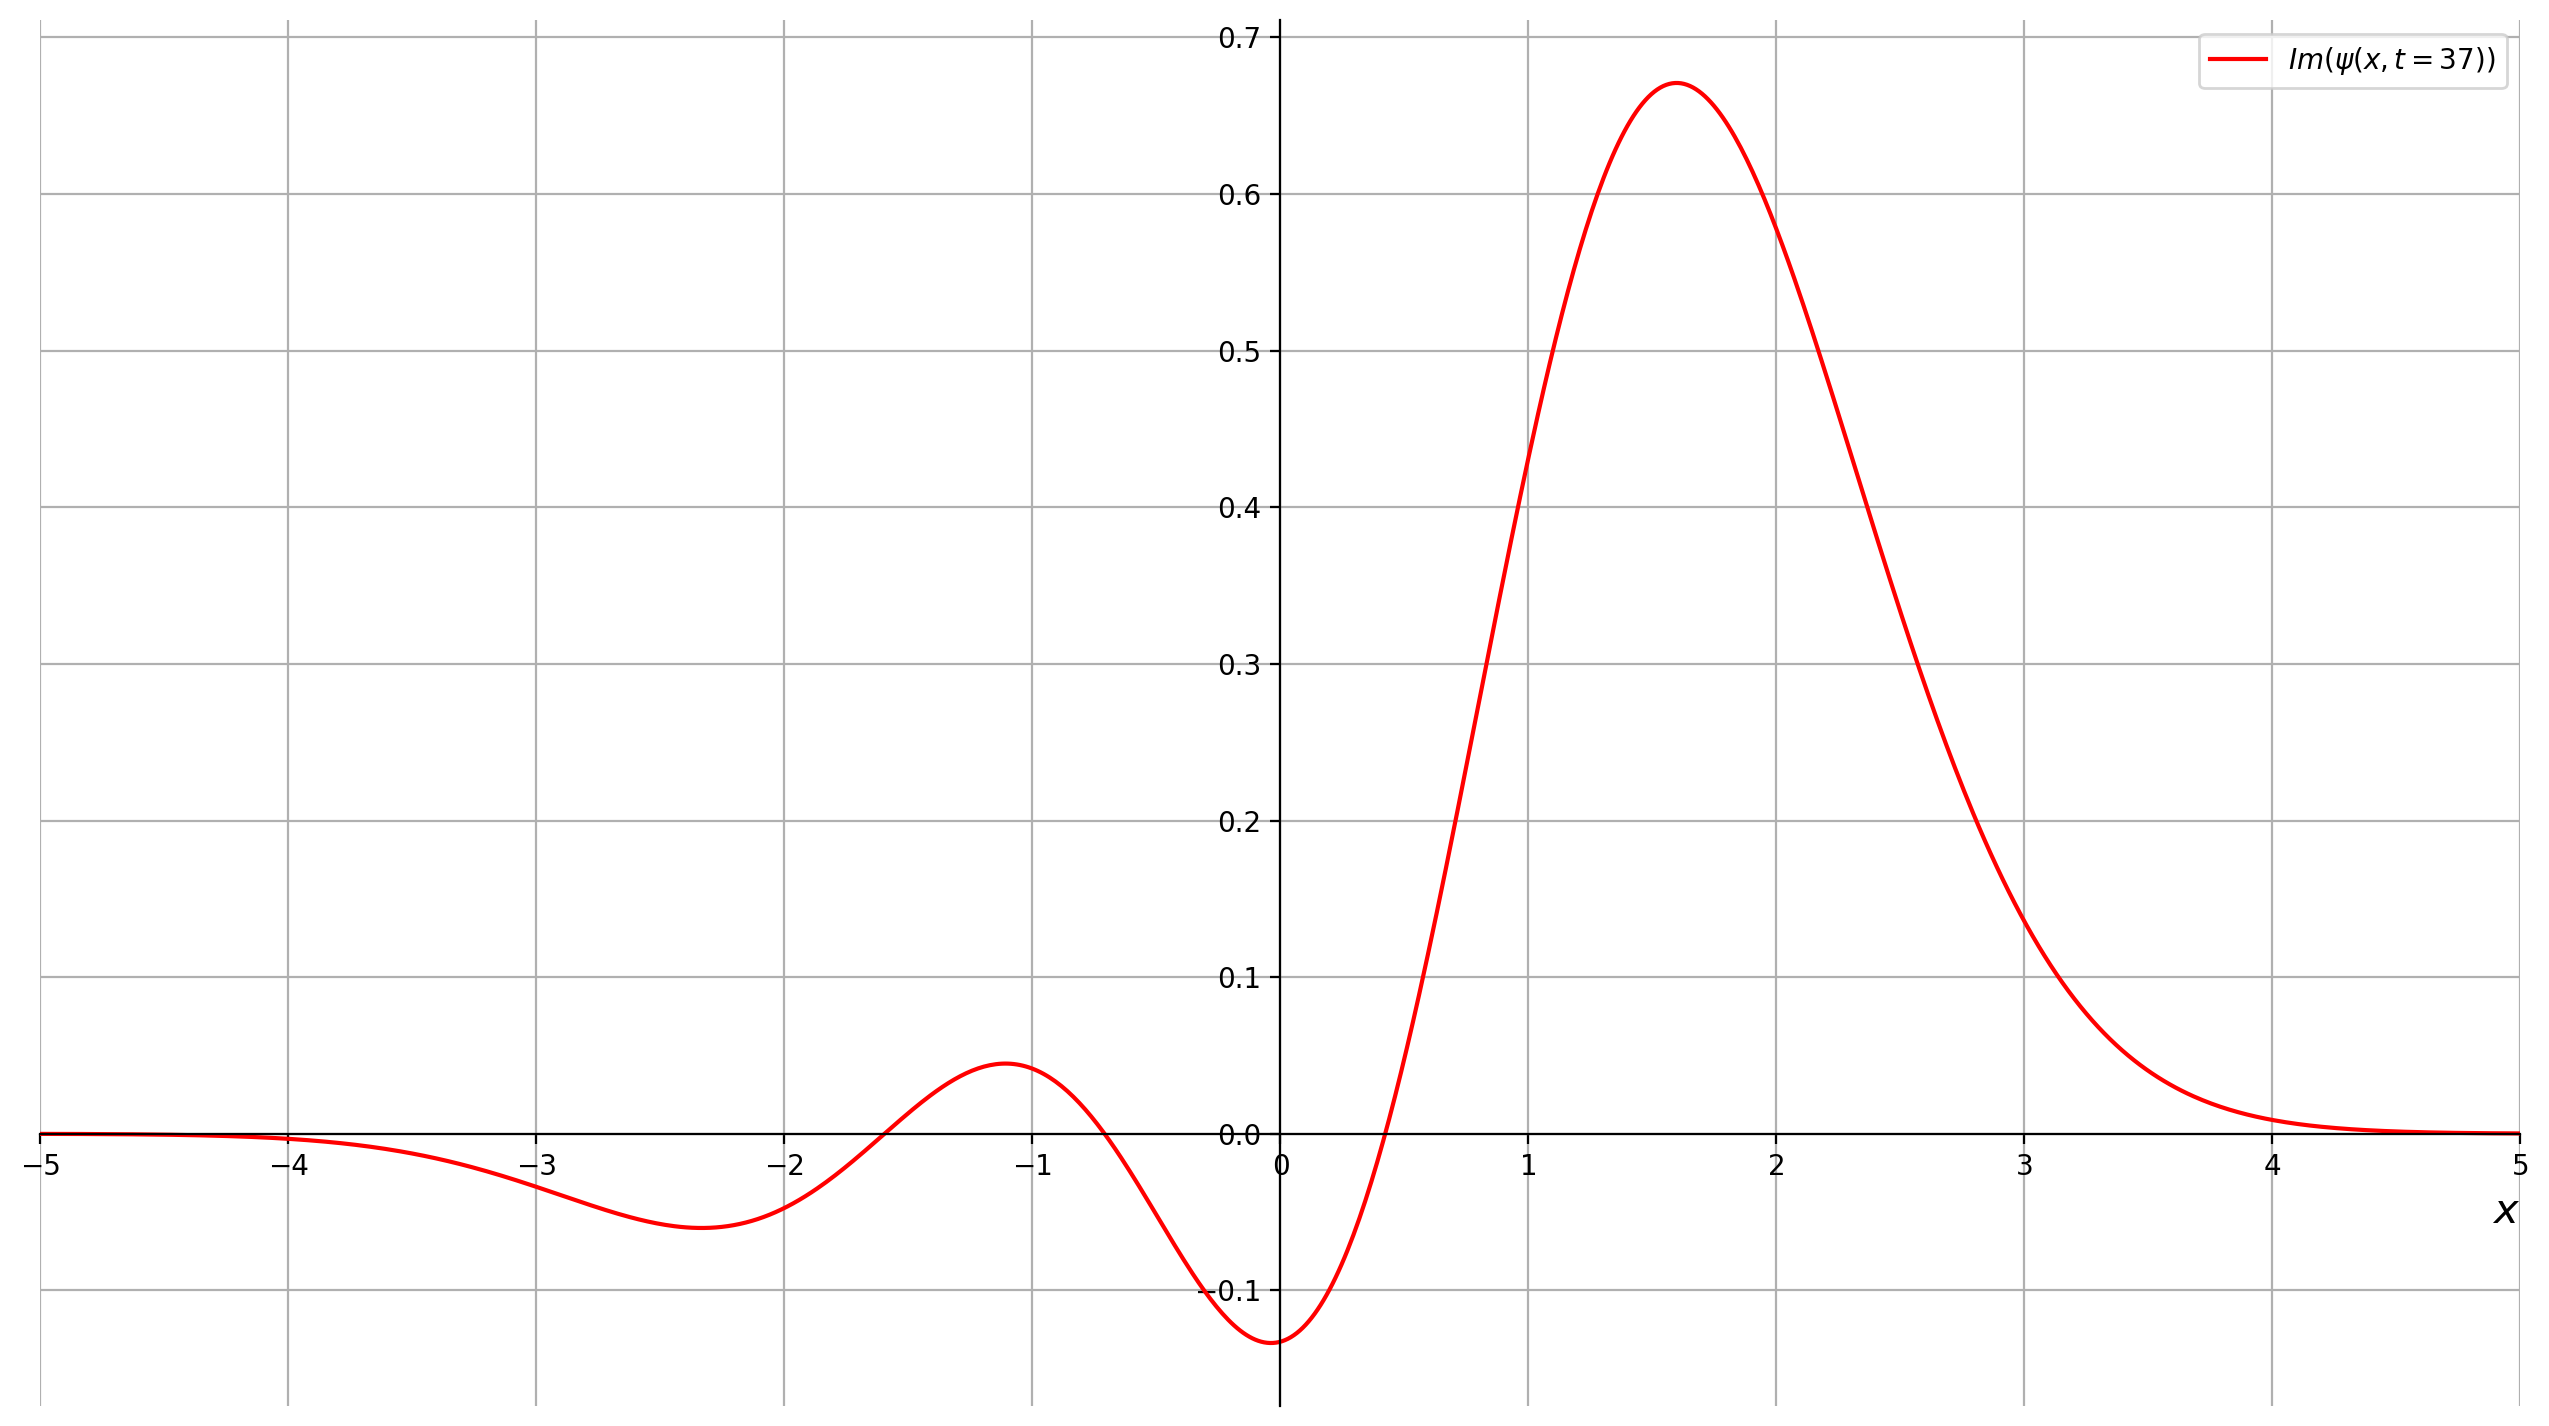

In [277]:
lam_psi_im = lambdify(x, im, modules=['numpy'])
x_var = linspace(-6,6,1000)
psi_im = lam_psi_im(x_var)

fig, ax = plt.subplots(1,1, figsize=(16,9), dpi=200)
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')

plt.xlim(-5,5)
ax.set_xlabel(r'$x$', fontsize=15, loc='right')
ax.set_xticks(arange(-5, 5.5, 1))
ax.grid(True)
ax.plot(x_var, psi_im, label=r'$Im(\psi(x, t=37))$', color='red')
ax.legend()
plt.savefig('Imag.jpeg',bbox_inches='tight')

plt.show()

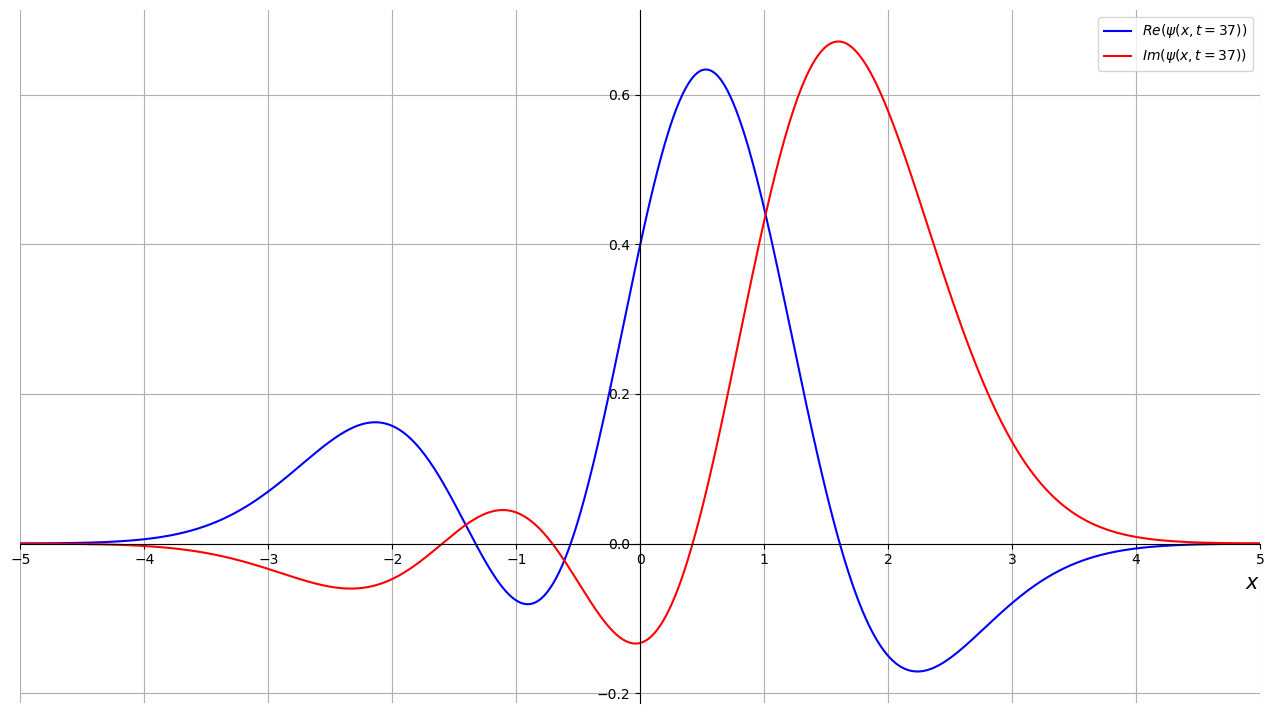

In [278]:
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
plt.xlim(-5,5)

ax.set_xlabel(r'$x$', fontsize=15, loc='right')
ax.set_xticks(arange(-5, 5.5, 1))
ax.grid(True)
ax.plot(x_var, psi_re, label=r'$Re(\psi(x, t=37))$', color='blue')
ax.plot(x_var, psi_im, label=r'$Im(\psi(x, t=37))$',color='red')
ax.legend()
plt.savefig('both.jpeg',bbox_inches='tight')

plt.show()

The absolute value squared of the wavefunction, $|\psi(x, t=37)|^2$ is plotted below:

In [264]:
print(type(psi))

<class 'sympy.core.add.Add'>
